In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [48]:
data = pd.read_csv('schooldata.csv')
 #read file

In [73]:
# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [74]:
# Encode categorical variables
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=33)

In [78]:
# Train the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.83      0.96      0.89        26
           2       0.85      0.81      0.83        48

    accuracy                           0.83        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.83      0.83      0.83        96



In [87]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [92]:
data = pd.read_csv('schooldata.csv')
 
# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Encode categorical variables in the features
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Decode the predicted and actual labels
y_pred_decoded = le.inverse_transform(y_pred)
y_test_decoded = le.inverse_transform(y_test)

# Evaluate the model
print(classification_report(y_test_decoded, y_pred_decoded))

              precision    recall  f1-score   support

           H       0.81      0.77      0.79        22
           L       0.89      0.96      0.93        26
           M       0.87      0.85      0.86        48

    accuracy                           0.86        96
   macro avg       0.86      0.86      0.86        96
weighted avg       0.86      0.86      0.86        96



In [94]:
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print("Accuracy:", accuracy)

Accuracy: 0.8645833333333334


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('schooldata.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Encode categorical variables in the features
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Encode the target variable using the same LabelEncoder object
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Decode the predicted and actual labels
y_pred_decoded = le.inverse_transform(y_pred)
y_test_decoded = le.inverse_transform(y_test)

predictions_df = pd.DataFrame({'Predicted': y_pred_decoded, 'Category': ''})

# Define categories based on predicted scores
categories = {
    'L': 'Poor performance ',
    'M': 'Average performance',
    'H': 'High performance'
}

# Assign categories to predictions
predictions_df['Category'] = predictions_df['Predicted'].map(categories)

print(predictions_df)

# Evaluate the model
print(classification_report(y_test_decoded, y_pred_decoded))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



   Predicted             Category
0          M  Average performance
1          L    Poor performance 
2          H     High performance
3          M  Average performance
4          H     High performance
..       ...                  ...
91         M  Average performance
92         M  Average performance
93         M  Average performance
94         L    Poor performance 
95         H     High performance

[96 rows x 2 columns]
              precision    recall  f1-score   support

           H       0.81      0.77      0.79        22
           L       0.89      0.96      0.93        26
           M       0.87      0.85      0.86        48

    accuracy                           0.86        96
   macro avg       0.86      0.86      0.86        96
weighted avg       0.86      0.86      0.86        96

Accuracy: 0.8645833333333334


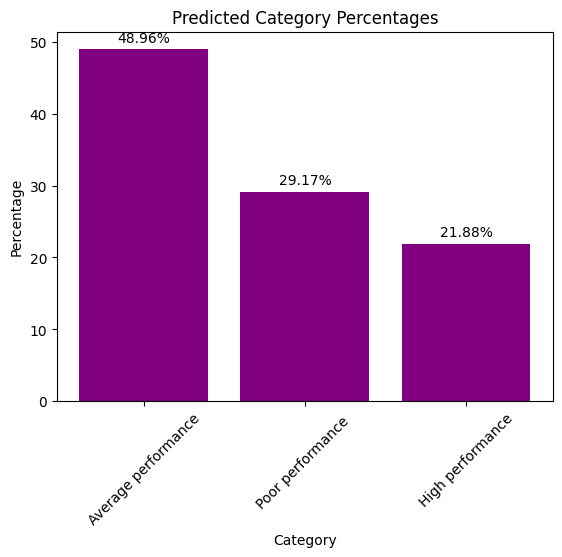

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Rest of your code...

# Assign categories to predictions
predictions_df['Category'] = predictions_df['Predicted'].map(categories)

# Count the occurrences of each category
category_counts = predictions_df['Category'].value_counts()

# Calculate the percentages
category_percentages = category_counts / len(predictions_df) * 100

# Set figure size
 

# Plot the percentages
bars = plt.bar(category_percentages.index, category_percentages.values, color='purple')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Predicted Category Percentages')

# Label the bars with the category labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}%', ha='center')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()